In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data= pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data= pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women that survived:",rate_women)

% of women that survived: 0.7420382165605095


In [5]:
men = data.loc[data.Sex=='male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men that survived:",rate_men)

% of men that survived: 0.18890814558058924


In [6]:
from sklearn.ensemble import RandomForestClassifier

y= data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X=pd.get_dummies(data[features])
X_test=pd.get_dummies(test_data[features])

model= RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived' : predictions})
output.to_csv('submussion.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Now I'm gonna go more in depth into the data, trying to find the link between Sex and other factors that could vary the survival rate but first we wanna take a look at the graphic data that we have and try to understand it better.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_rows = data.shape[0]
test_data_rows = test_data.shape[0]

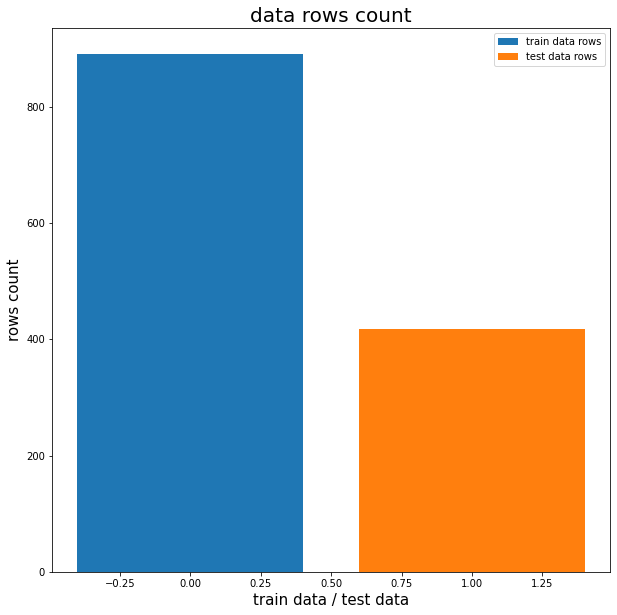

In [9]:
plt.figure(figsize=(10,10))
plt.bar(0, data_rows,label="train data rows")
plt.bar(1, test_data_rows,label="test data rows")
plt.xlabel("train data / test data",fontsize=15)
plt.ylabel("rows count",fontsize=15)
plt.legend()
plt.title("data rows count",fontsize=20)
plt.show()

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Checking for missing values

In [12]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Lets redo the same for the test data we were given.

In [13]:
test_data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Now It's time to do some EDA, Seeing if we can find a link between Sex & Survival rate

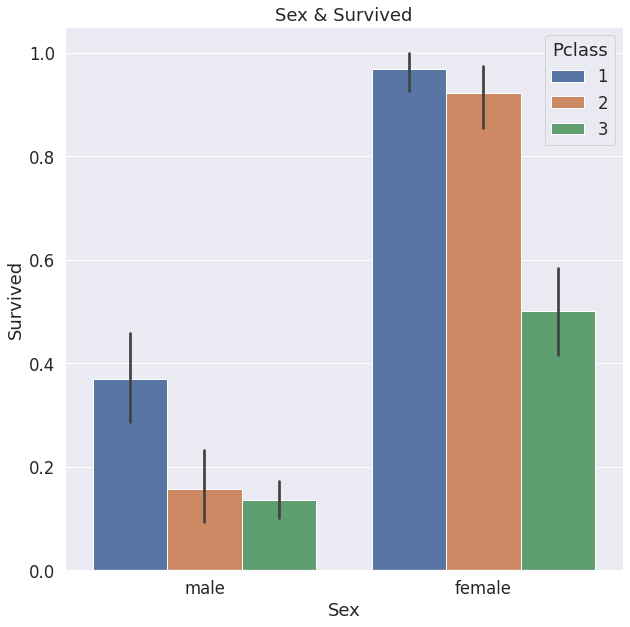

In [14]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Sex & Survived")
sns.barplot(x="Sex",y="Survived",hue="Pclass", data=data)
plt.show()

We can conclude from this graph that:


1-Female passengers survival rate>Male passengers survival 
rate


2-Survival rate varies with the Pclass

We're gonna try & go more in depth into the sex part of this equation, see if it's really important.

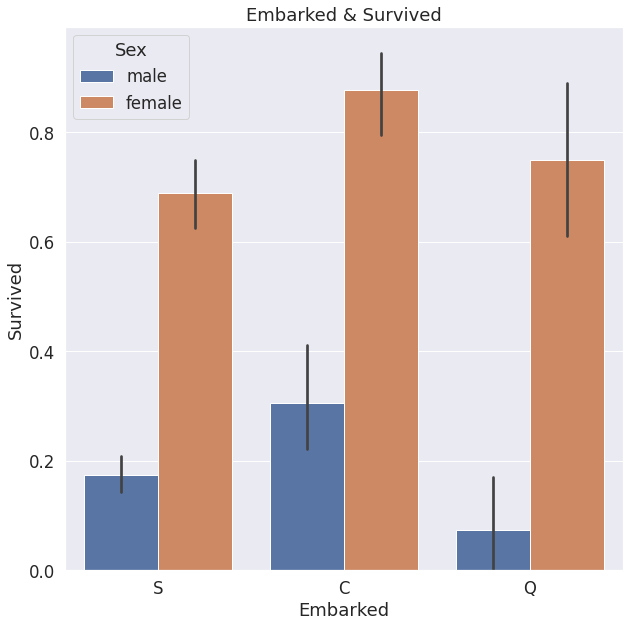

In [15]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Embarked & Survived")
sns.barplot(x="Embarked",y="Survived",hue="Sex",
           data=data)
plt.show()

2 conclusions we can come out with:
1- Sex is definitly a factor here, Since the number of females are significantly higher than those of the males.


2- The  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
is also a factor, as the data shows: C > S > Q

Now let's go even more in depth into the data we have. One label certainly peaked my interest: SibSp(Number of Siblings/Spouses on board), Let's see if there's a link with the probability of suvival


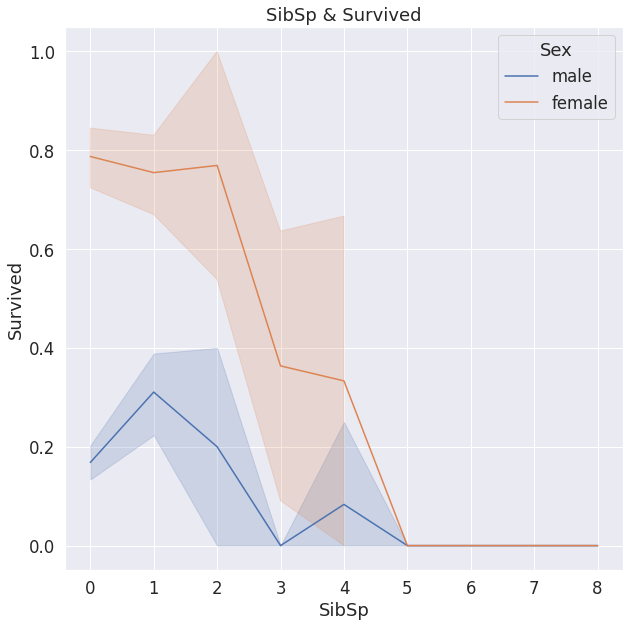

In [16]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("SibSp & Survived")
sns.lineplot(x="SibSp",y="Survived",
            hue="Sex",data=data)
plt.show()

As Usual, 2 conclusions:
1- The Higher the SibSp value is, the Lower the probability of survival is.
2- Female survival is still higher than male, But if the number of SibSp>= 5, No one survives.

Let's Keep going with every label that exists in the data to see if there's a clear link while still keeping sex as a factor.

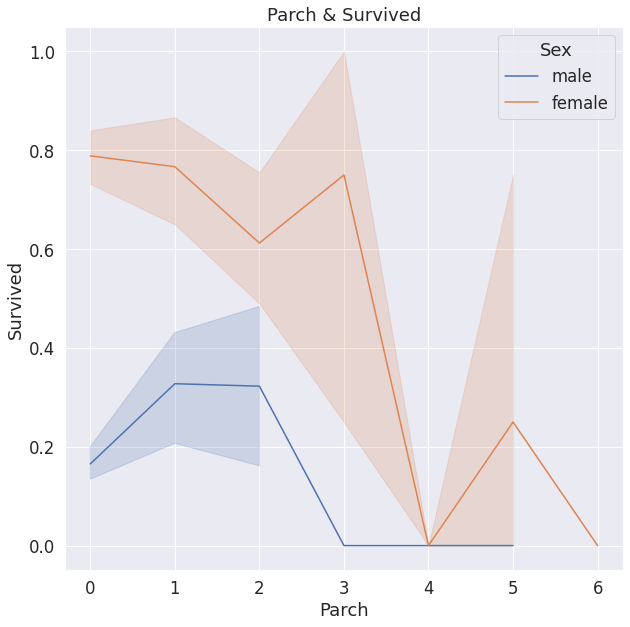

In [17]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Parch & Survived")
sns.lineplot(x="Parch",y="Survived",
             hue="Sex",data=data)
plt.show()

Parch=Number of Parent/children on board

One common thing with SibSp, other than sex, is the higher the value of Parch, the lower the rate of survival.

However no new link with the survival rate.

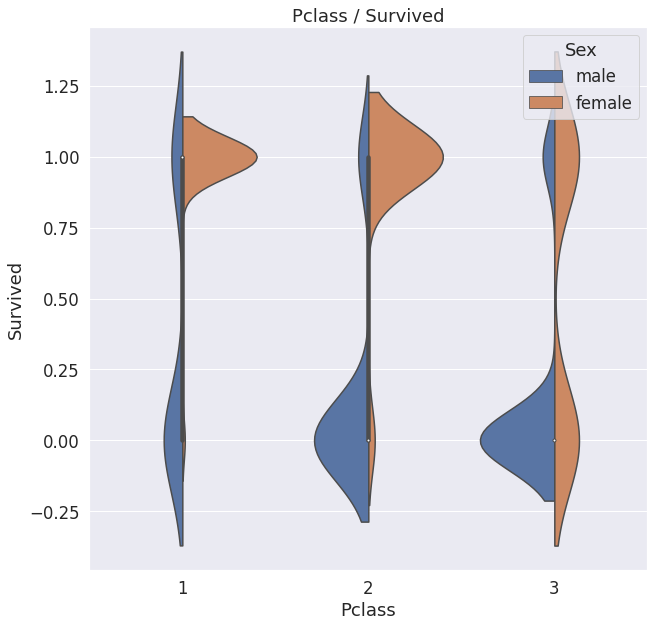

In [18]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Pclass / Survived")
sns.violinplot(x="Pclass",y="Survived"
              ,hue="Sex",data=data,
              split=True)
plt.show()

No clear link with the Pclass & survival rate, Other than the fact that Male in 3rd Pclass have a very low probability of survival and females in 1st & 2nd Pclass have high probabilites, Which I think is related to sex & not to Pclass.

Let's dive into the age of the passengers, Lets see the age distribution on board & try to find a link.

<Figure size 720x720 with 0 Axes>

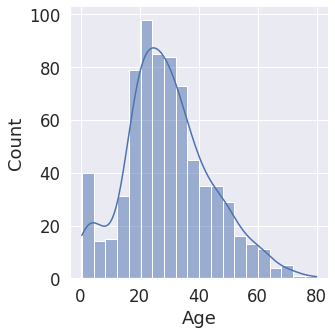

In [19]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.displot(x="Age",data=data
           ,kde=True)
plt.show()

In [20]:
AgeGroup = []
for i in data["Age"]:
    if i<=4:
        AgeGroup.append("Baby")
    elif 4 < i <= 15:
        AgeGroup.append("Child")
    elif 15 < i <= 60: 
        AgeGroup.append("Adult")
    elif 60 <= i:
        AgeGroup.append("Elder")
    else: 
        AgeGroup.append(np.NaN)
        


In [21]:
data["AgeGroup"]= AgeGroup

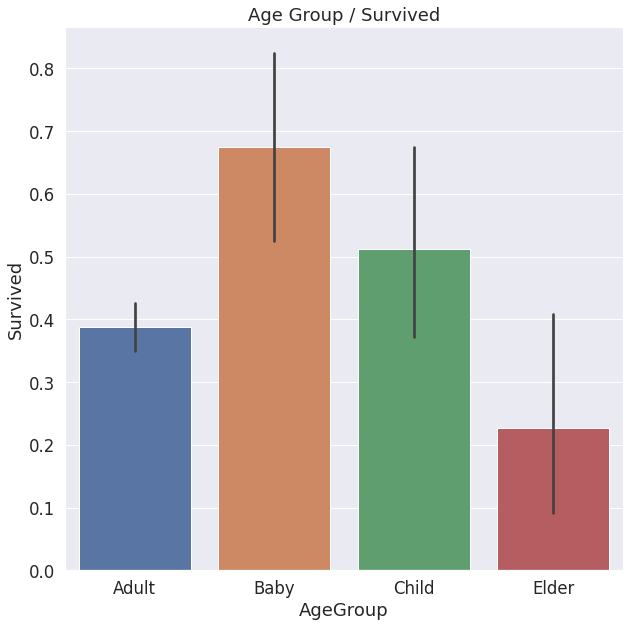

In [22]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Age Group / Survived")
sns.barplot(x="AgeGroup",y="Survived"
            ,data=data)
plt.show()

After that last graph We can conclude that the lower the age is the higher the probability of survival

Let's make a heatmap to try to find links between labels

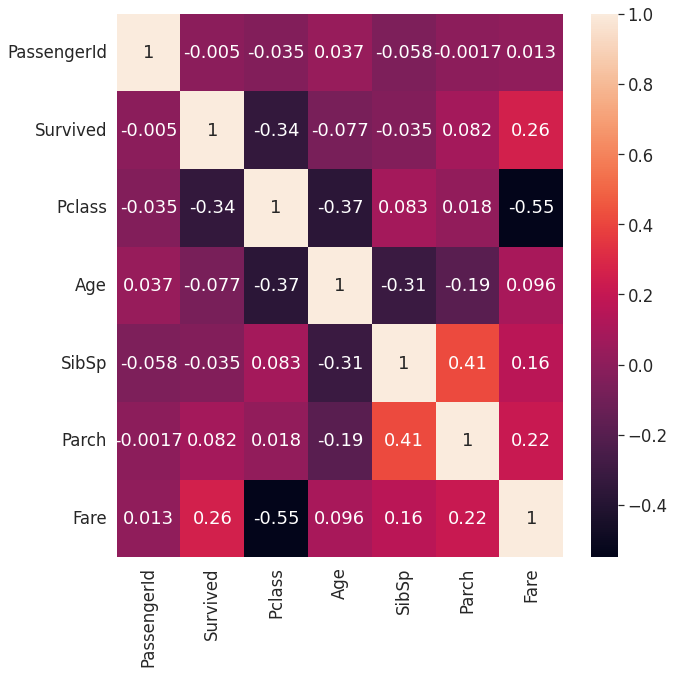

In [23]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),annot=True)
plt.show()

Correspondence between SisSp and Parch is high so let's group em.


In this competition, Data is already cleaned & prepared for training but I'm gonna do it anyway to deal with NaN values & for practice

In [24]:
data["Cabin"].fillna("Unknown",
                    inplace=True)
Cabin_unit = []
for i in data["Cabin"]:
    Cabin_unit.append(i[0])
data["Cabin_unit"] = Cabin_unit


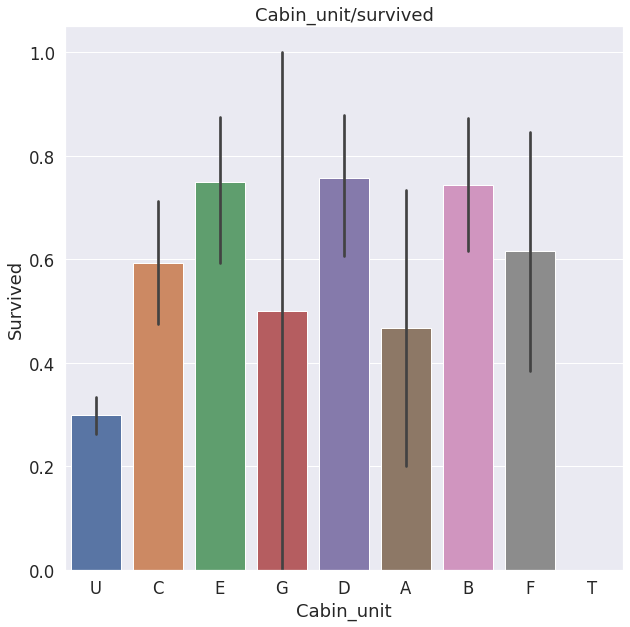

In [25]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Cabin_unit/survived")
sns.barplot(x="Cabin_unit",
           y="Survived",data=data)
plt.show()

In [26]:
data.Name.str.split(",",expand=True)[1].str.split('.',expand=True)[0].str.strip().value_counts()
data['Name_re']=data.Name.str.split(',',expand=True)[1].str.split('.',expand=True)[0].str.strip().replace({'Mlle': 
                         'Miss', 'Ms': 'Miss', 'Lady': 
                         'Uncommon', 'Don': 'Uncommon',
                         'Jonkheer': 'Uncommon', 'the Countess'
                         : 'Uncommon', 'Sir': 'Uncommon', 
                         'Mme': 'Uncommon', 'Capt': 'Mr', 
                         'Major': 'Mr', 'Col':
                         'Mr', 'Rev': 'Mr', 'Dr': 'Mr'})
data["Name_re"].value_counts()



data
                        
                        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_unit,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Adult,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Adult,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,Adult,U,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S,NaN,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,C,Mr


Dropping Name since it's useless data & a memory leak

In [27]:
data.drop("Name",axis=1,inplace=True)

In [28]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [29]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
data["Embarked"].fillna("S",inplace=True)
data["Embarked"].value_counts()
#2 values added

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
#Grouping sibsp & Parch into family
data["Family"]= data["SibSp"]+data["Parch"]
data.drop(["SibSp","Parch"],axis=1,inplace=True)


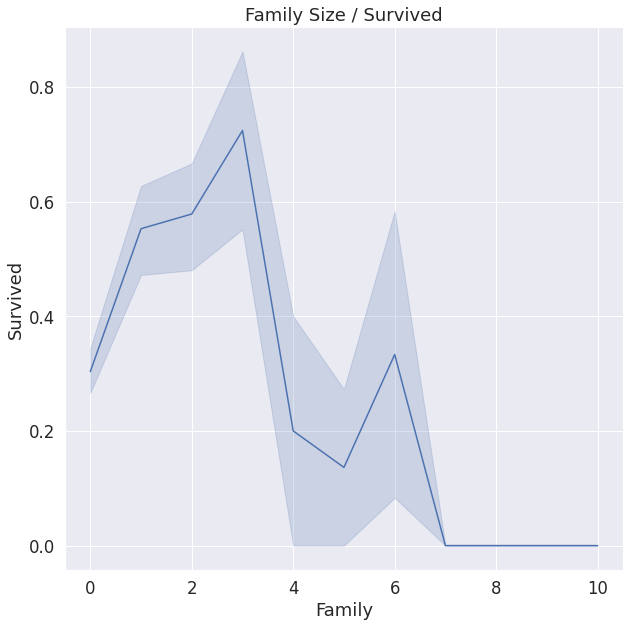

In [32]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Family Size / Survived")
sns.lineplot(x="Family",y="Survived"
            ,data=data)
plt.show()

In [33]:
Alone = []
for i in data["Family"]:
    if i == 0:
        Alone.append(True)
    else: 
        Alone.append(False)
data["Alone"]=Alone
data["Alone"]=data["Alone"].astype("int")
data

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_unit,Name_re,Family,Alone
0,1,0,3,male,22.000000,A/5 21171,7.2500,Unknown,S,Adult,U,Mr,1,0
1,2,1,1,female,38.000000,PC 17599,71.2833,C85,C,Adult,C,Mrs,1,0
2,3,1,3,female,26.000000,STON/O2. 3101282,7.9250,Unknown,S,Adult,U,Miss,0,1
3,4,1,1,female,35.000000,113803,53.1000,C123,S,Adult,C,Mrs,1,0
4,5,0,3,male,35.000000,373450,8.0500,Unknown,S,Adult,U,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,211536,13.0000,Unknown,S,Adult,U,Mr,0,1
887,888,1,1,female,19.000000,112053,30.0000,B42,S,Adult,B,Miss,0,1
888,889,0,3,female,29.699118,W./C. 6607,23.4500,Unknown,S,NaN,U,Miss,3,0
889,890,1,1,male,26.000000,111369,30.0000,C148,C,Adult,C,Mr,0,1


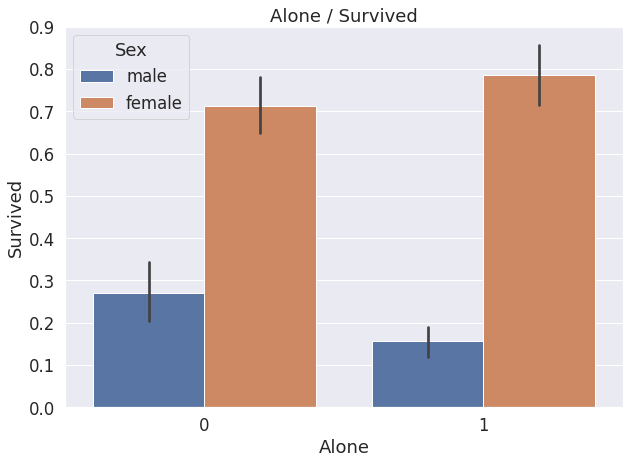

In [34]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
plt.title("Alone / Survived")
sns.barplot(x="Alone",y="Survived"
           ,hue="Sex", data=data)
plt.show()

Valuable data & link's here :p

In [35]:
data["Cabin_unit"].replace({"T":"U"},inplace=True)

In [36]:
data.drop(["Ticket","Cabin"],axis=1,inplace=True)

In [37]:
data= pd.get_dummies(data,columns=["Sex","Embarked","Cabin_unit","Name_re"],drop_first=True)
data

,PassengerId,Survived,Pclass,Age,Fare,AgeGroup,Family,Alone,Sex_male,Embarked_Q,...,Cabin_unit_C,Cabin_unit_D,Cabin_unit_E,Cabin_unit_F,Cabin_unit_G,Cabin_unit_U,Name_re_Miss,Name_re_Mr,Name_re_Mrs,Name_re_Uncommon
0,1,0,3,22.000000,7.2500,Adult,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2,1,1,38.000000,71.2833,Adult,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,1,3,26.000000,7.9250,Adult,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4,1,1,35.000000,53.1000,Adult,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,0,3,35.000000,8.0500,Adult,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,13.0000,Adult,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
887,888,1,1,19.000000,30.0000,Adult,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
888,889,0,3,29.699118,23.4500,NaN,3,0,0,0,...,0,0,0,0,0,1,1,0,0,0
889,890,1,1,26.000000,30.0000,Adult,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
x=data.drop(["PassengerId","Survived","AgeGroup"],axis=1)
y=data["Survived"]
x.shape, y.shape

((891, 19), (891,))

Data cleaned & we got what we need as well as the links with survival rate, time for the modeling for the machine